# Machine Learning (CMP3751M/CMP9772M) - Assessment 02

Through the following notebook, you will be analysing a dataset and fitting a classification model to this dataset.

The assessment is structured as follows:
- [Dataset description](#Dataset-description)
- [Loading the dataset](#Loading-the-dataset)
- [Simple classification model](#Simple-classification-model)
    - [Creating a training and testing set](#Creating-a-training-and-testing-set)
    - [Training a classifier](#Training-a-classifier)
- [Improved evaluation strategy](#Improved-evaluation-strategy)
- [Different models and parameter search](#Different-models-and-parameter-search)
- [Ensembles](#Ensembles)
- [Final model evaluation](#Final-model-evaluation)
- [References](#References)

**Notes:**
- Any discussion not supported by your implementation will not be awarded marks.
- **Do not modify** any code provided as a **TESTING CELL**.
- Make sure to **fix all the random seeds** in any parts of your solution, so it can be reproduced exactly.
- The notebook, as provided, runs without errors (without solving the assessment). Make sure that the solution, or the partial solution, you hand in, also **runs without errors** on the data provided. If you have a partial solution causing errors which you would like to show, please include it as a comment.
- Take care to include references to any external sources used. Check the [References](#References) section, the below cell, and the exambles through the assessment text for examples of how to do this.


In [1]:
# Remember to reference your sources! Check the bottom of the file, and examples used in the text of the assessment,
# for including references to papers and software in your textual answers

# Also add a reference in your solution cell before defining a class/function/method, eg.:

# This code is a modified and extended version of [3]
# OR
# This code is a modified and extended version of https://stackoverflow.com/q/522563/884412
##############
## THE CODE ##
##############

## Dataset description

The the assessment will be done on the dataset containing only numerical features describing the size and shape features of different varieties of dry beans [1]. (The dataset for this assessment has been adapted from the full dataset which can be found [here](https://www.muratkoklu.com/datasets/) [2]), shared in the public domain by the author).

Each sample describes the measurements of a bean of a single variety, and consists of following 16 features:

| Feature Name      | Value | Description |
| :---------------- | :----- | ----------- |
| `Area`       | `float` | Area of the bean in pixels. |
| `Perimeter` | `float` | Bean circumference is defined as the length of its border. |
| `MajorAxisLength` | `float` | The distance between the ends of the longest line that can be drawn from a bean. |
| `MinorAxisLength` | `float` | The longest line that can be drawn from the bean while standing perpendicular to the main axis. |
| `AspectRatio` | `float` | The ratio between the major and minor axis length. |
| `Eccentricity` | `float` | Eccentricity of the ellipse having the same moments as the region. |
| `ConvexArea` | `int` | Number of pixels in the smallest convex polygon that can contain the area of a bean seed. |
| `EquivDiameter` | `float` | The diameter of a circle having the same area as a bean seed area. |
| `Extent` | `float` | The ratio of the pixels in the bounding box to the bean area. |
| `Solidity` | `float` | Also known as convexity. The ratio of the pixels in the convex shell to those found in beans. |
| `Roundness`| `float` | Measures the roundness of an object. |
| `Compactness` | `float` | An alternative measure of object roundness. |
| `ShapeFactor1` | `float` | Shape features according to [4] |
| `ShapeFactor2` | `float` | Shape features according to [4] |
| `ShapeFactor3` | `float` | Shape features according to [4] |
| `ShapeFactor4` | `float` | Shape features according to [4] |



The goal for the assessment is to predict the variety of bean, listed in the last column, which provides a classification for each sample:

| Class      | Value | Description |
| :---------------- | :----- | ----------- |
| `Class`  | `string`: class designation | The variety of dry bean. |


## Loading the dataset

The dataset is given in _beans.csv_ file provided on Blackboard. **Load the dataset into two [`numpy.array`](https://numpy.org/doc/stable/reference/generated/numpy.array.html)s.**: 
- The variable `X` should be a 2D [`numpy.array`](https://numpy.org/doc/stable/reference/generated/numpy.array.html) containing all the samples and their features from the dataset, one sample per row. 
- The variable `y` should be a 1D [`numpy.array`](https://numpy.org/doc/stable/reference/generated/numpy.array.html) containing the ground truth (class) as given in the `'Class'` field of the _.csv_ file.
- _Note_: The class in the `'Class'` column is given as a string. Make sure you encode the class as an integer number in your ground truth `y`.
- _Note_: You should make sure that your code for loading the dataset is guided by the information about the dataset, and the dataset description you provide as your answer.

**Describe the dataset**. Provide a basic description of the dataset. How many samples are there in the dataset? How many distinct classes? What types of features describe the samples in the dataset? Are there any missing values in the dataset? (Make sure these are properly handled). 
- _Note_: Make sure all your answers are supported by your implementation. Answers not supported by your implementation will not score any marks.

Provide your code to _load the dataset_ and the code that will allow you to _describe the dataset_ in the **SOLUTION CELL**. Provide your description of the dataset in the **ANSWER CELL**. A correct solution should result in no errors when running the **TESTING CELL** provided.

**SOLUTION CELL**

In [71]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('beans.csv')


data = data.bfill()   #Handling missing data https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.bfill.html

#Seperating features and class as required
X = data.drop(columns = ['Class']).values #Store all features except class in x, .values converts the data to a numpy array
y = data['Class'].values #Store Class Labels .values converts the data to a numpy array

#Encode class labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  #converts string to integer

data.head() #Output the head to see a preview of the dataset using the .head() method. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,68035,1022.207,355.899595,244.028109,1.458437,0.727917,69243,294.321002,0.797017,0.982554,0.818210,0.826978,0.005231,0.001509,0.683892,0.997413,BARBUNYA
1,66871,990.128,372.968458,229.417890,1.625717,0.788439,67765,291.792395,0.801868,0.986807,0.857166,0.782351,0.005577,0.001289,0.612074,0.995058,BARBUNYA
2,89235,1197.862,395.687961,288.807741,1.370074,0.683567,90764,337.071996,0.769082,0.983154,0.781505,0.851863,0.004434,0.001440,0.725671,0.994223,BARBUNYA
3,60408,999.737,369.487535,208.936425,1.768421,0.824765,61404,277.333472,0.742478,0.983780,0.759509,0.750590,0.006117,0.001198,0.563385,0.996301,BARBUNYA
4,70344,1037.985,378.651095,237.909773,1.591574,0.777964,71521,299.273725,0.821354,0.983543,0.820455,0.790368,0.005383,0.001296,0.624682,0.994227,BARBUNYA


**TESTING CELL**

In [35]:
assert(len(X.shape) == 2)
assert(len(y.shape) == 1)
assert(X.shape[0] == y.shape[0])

**ANSWER CELL**

1. The dataset contains 2900 samples.
2. The dataset contains 16 Numerical Features stored in X, these describe the geometric properties. The dataset also contains 1 Categorical feature Class stored in y.
3. There are 7 Unique Classes in the dataset. ( BARBUNYA , BOMBAY , CALI , DERMASON , HOROZ , SEKER, SIRA )
4. Missing Values were handled using the backward fill function ( .bfill() ) which copies the next downward target in the column to fill the missing value. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.bfill.html

## Simple classification model

To get the feel for the dataset, the first step will be to build train a simple classification model for this dataset. Do this in two steps detailed below:
1. Set aside some data for training and for testing.
2. Train a simple classifier on this data.

### Creating a training and testing set

**Set aside 20\% of the data for testing, and use the remaining 80\% to train your model.** Make sure to fix any random seeds if you use any functions or methods relying on those, so your experiments are _fully repeatable_. Initialise the following variables:
- `X_train` should contain the features corresponding to your training data.
- `y_train` should contain the ground truth of your training data.
- `X_test` should contain the features corresponding to your testing data.
- `y_train` should contain the ground truth associated to your testing data.

_Note:_ No additional marks will be rewarded for implementing an advanced data splitting strategy on this task. The purpose of this task is to start working with the dataset by applying a simple approach; you will have the chance to implement more complex evaluation pipelines in a later task.

Provide your implementation in the **SOLUTION CELL (a)** below. A correct solution should result in no errors when running the **TESTING CELL** provided.

### Training a classifier

**Train a simple classifier,** (of your choosing) **with fixed parameters** on the dataset, and **calculate accuracy on the test set**.
- Define a function `model_accuracy(y_test, y_pred)` to compare the ground truth given in `y_test` to predictions given in `y_pred` and calculate accuracy.
- **Store the model** in the variable named `model`. For the model, you may chose any classifier with which you are familiar (e.g. K Nearest Neighbours), or implement your own classifier. Make sure you **train your model** using the _training data_ only (`X_train`, `y_train`).
- Use the model to **predict the classes of the data** in the testing set (`X_test`), and calculate the accuracy by comparing the predictions with the ground truth for the testing set (`y_test`). **Store the predictions** in a variable called `y_pred`.

_Note:_ Do not implement an advanced strategy to chose the parameters of your classifier here, as that will be a topic of a latter question.

_Note:_ If you implement your own classifier, make sure you implement it as a _class_ following the _sklearn_ standard for classifiers (i.e. make sure it implements the `fit(X, y)` method to train the model, and `predict(X)` method to use the trained model to predict the classes of provided samples.


**Discuss the advantages and shortcomings** of the evaluation strategy implemented through this task. Discuss both the data split used for evaluation and the choice of metric. Taking into account the information you know about the dataset, what kind of accuracy scores can you expect on this dataset from a good and bad performing model? Based on the information you have so far, comment on the performance of the model you have trained on the provided dataset.

Provide your implementation in the **SOLUTION CELL (b)** below. The **TESTING CELL** below should run without errors and will print the prediction of your model for the first sample in the test set, and the accuracy as calculated by your `model_accuracy` function. Provide your discussion in the **ANSWER CELL** below.

**SOLUTION CELL (a)**

In [36]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #Split the data to 80% training data 20% testing data

**TESTING CELL**

In [37]:
assert(X_train.shape[0] == y_train.shape[0])
assert(X_test.shape[0] == y_test.shape[0])
assert(X_train.shape[1] == X_test.shape[1])

**SOLUTION CELL (b)**

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def model_accuracy(y_test, y_pred):
    #Calculates the accuracy of the model using the accuracy_score function from sklearn metrics. https://www.educative.io/answers/what-is-the-accuracyscore-function-in-sklearn
    return accuracy_score(y_test, y_pred)

model = KNeighborsClassifier(n_neighbors = 3) # Use 3 neighbours for the knn model

model.fit(X_train, y_train) #Use the training data to train the model

y_pred = model.predict(X_test)

**TESTING CELL**

In [39]:
print(model.predict(X_test[0].reshape(1,-1)))
print(model_accuracy(y_test, y_pred))

[0]
0.6396551724137931


**ANSWER CELL**

##### Evaluation Strategy
- Dataset was split 80% Training and 20% Testing. THis ensures the model is evaluated on unseen data, provding a quick measure of the model's performance
- Evaluation metric used was accuracy, thios measures proprotion of correctly classified samples / the total number of samples. Given the dataset is balanaced from the information gathered so far, this this was deemeded an appropriate metric. https://www.educative.io/answers/what-is-the-accuracyscore-function-in-sklearn

##### Model Performance
- Trained classifier predicted the first sample in the test (y_pred for X_test[0]) set as [0] which corressponds to the first encoded class. (BARBUNYA)
- Overall accruacy was 63.97% (0.639655) indicating moderate performance of the model.
- A good model would be expected achieve 90% + given the deatures in the dataset provide meaningful information and meta data about the classes.
- A poor model woud achieve accuracy through random guessing which would be significantly lower than 63.97%
- Due to this the current model's performance can be deemed as moderate and can be optimized using things such as hyperparameter tuning or feature selection.
- (https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn)

##### Shortcomings
- With a single train-test split, the performance may depend on how the data was split, leading to unreliable results and variablity in results. https://builtin.com/data-science/train-test-split , https://towardsdatascience.com/3-tips-for-working-with-imbalanced-datasets-a765a0f3a0d0
- While accuracy provides an over all metric on the model's performance, it does not provide any insight on how the model performed for each class. In datasets with imbalanced classes metrics such as precision recall and F1-score are important to provide these insights. https://keylabs.ai/blog/understanding-the-f1-score-and-auc-roc-curve/

## Improved evaluation strategy

After discussing the shortcomings of the simple evaluation strategy used in the previous task, you now have a chance to **propose a better evaluation strategy.** Make sure your chosen strategy **uses all the samples in the dataset** to report the result.
- **Implement a function** `evaluate_model(model, X, y)` to implement your proposed evaluation strategy. The function should evaluate the model given in `model` on the dataset given by `X` with ground truth given by `y`. Note that the function should be passed the _whole of the dataset_ (see **TESTING CELL** below) and should take care of any data splitting internally.
- If desired, you may add additional arguments to this function, as long as they have default values and the function runs correctly when called using those default values.
- The function should return no values, but instead print the results of the evaluation in a human-readable format.
- Include at least one summative metric (providing a single number, e.g. accuracy) and per-class metric (e.g. precision) calculated for every class. You are encouraged to select more than one metric of each type.

This function will be used to provide a better evaluation of the simple model with fixed parameters used in the previous task.

**Discuss your chosen evaluation strategy**, including both the data split and the evaluation metrics. Which data splitting strategy did you chose and why? Which metrics did you chose, and why? Briefly explain the chosen data splitting strategy. What additional information can your additional metrics provide beyond accuracy?

Provide your implementation of this function in the **SOLUTION CELL**. You may also include any additional evaluation calls you want to include in this code cell. The **TESTING CELL** will perform a basic evaluation of your `model` using the `evaluate_model` function implemented for this task. Provide your discussion in the **ANSWER CELL** below.

**SOLUTION CELL**

In [42]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report

def evaluate_model(model, X, y): #n_folds defines the number of folds used for cross-validation
    skf = StratifiedKFold(n_splits = 5, shuffle= True, random_state=42)
    fold = 1
    accuracies = [] #Empty array to hold accuracy to calculate the Mean Accuracy and Standard Diviation of Accuracy
    print('Cross Validation Results:')
    print('=' * 50) # Creates after the title for a cleaner output layout and more interperetable

    for train_index, test_index in skf.split(X, y):
        #Split data for current fold index for iteration purposes
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        #Train Model using current fold split
        model.fit(X_train, y_train)
        #Make Prediction
        y_pred = model.predict(X_test)
        #Calculate Accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy) #Append the current fold's accuracy to the accuracies array

        #Printing out the acccuracy and metrics per class
        print(f'Fold {fold} Accuracy: {accuracy:.4f}') #Outputs the fold number and accuracy of that fold
        print(f'Metric Per Class:')
        #Output the classification report for current fold, showing the precision / recall / f1-score / support for each class label
        print(classification_report(y_test, y_pred, target_names=label_encoder.classes_)) #https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.classification_report.html
        print('-' * 50) #Creates a line at the bottom of the current classifcation report to seperate it from the next fold
        fold += 1 #Iterate thropugh the folds in the for loop to move to the next train and test index

     # Summarize results across folds
    print("-" * 50)
    print(f"Mean Accuracy: {np.mean(accuracies):.4f}")
    print(f"Standard Deviation: {np.std(accuracies):.4f}")




**TESTING CELL**

In [43]:
evaluate_model(model, X, y)

Cross Validation Results:
Fold 1 Accuracy: 0.6914
Metric Per Class:
              precision    recall  f1-score   support

    BARBUNYA       0.43      0.46      0.44        50
      BOMBAY       1.00      1.00      1.00        20
        CALI       0.59      0.57      0.58        60
    DERMASON       0.79      0.92      0.85       200
       HOROZ       0.69      0.62      0.65        60
       SEKER       0.62      0.36      0.46        80
        SIRA       0.64      0.67      0.66       110

    accuracy                           0.69       580
   macro avg       0.68      0.66      0.66       580
weighted avg       0.68      0.69      0.68       580

--------------------------------------------------
Fold 2 Accuracy: 0.6638
Metric Per Class:
              precision    recall  f1-score   support

    BARBUNYA       0.46      0.46      0.46        50
      BOMBAY       1.00      1.00      1.00        20
        CALI       0.65      0.62      0.63        60
    DERMASON       0.76  

**ANSWER CELL**

##### Chosen Evaluation Strategy
- Stratified K-Fold Cross Validation was used as it ensures all samples are used for training and testing. Cross Validation also maintains class proportions in each fold which is important for datasets with imbalanced classes. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html
- Using multiple splits, in this case 5 splits reduces the variance in evaluation and helps us obtain reliable estimates on the model's generalization performance in comparison to using a single train test split. https://towardsdatascience.com/3-tips-for-working-with-imbalanced-datasets-a765a0f3a0d0
##### Chosen Metrics
- Accuracy measures the overall correctness or accuracy of the predictions made by the model. This is a standard metric when evaluating a model's performance.
- Precision Recall and F1 - Score were chosen as they give more in depth insight on how the model handles each indivual class.
    - Precision provides an insight on the relevance of the predictions made.
    - Recall measures the ability to retrieve all relevant instances in the class.
    - F1-Score is used to balance precision and recall offering a balanced measure of a classifier's performance. It is very useful for imbalanced datasets where FP and FN play a significant role. https://keylabs.ai/blog/understanding-the-f1-score-and-auc-roc-curve/

##### Advantages of New Evaluation Strategy
- Cross Validation ensures a robust evaluation as it uses all data for training and testing, reducing the biases due to the 5 splits it creates.
- The per class metrics provided by my new evaluation strategy provide a deeper insight on how the model performs for each class. This can help identify classes that are poorly handled by the model. After reviewing the evaluation it is evident that our model's performance is poor when it comes to the classes BARBUNYA and SEKER as the f1 scores for these are the lowest across all 5 folds.
- The mean and standard diviation of the acurracy across all folds of the evaluation model provides an estimate of the model's stability and consistency as well as over all performance.
- This new evaluation strategy highlights insights using Per Class Metrics which can help determine that BOMBAY class shows perfect precision recall and f1-score of 1.00 for all the folds. This helps the arrival at the conclusion that BOMBAY is a rare class and must have unique features such as a high area which isolate it from the rest of the classes.

## Different models and parameter search

Now that you have a [better evaluation strategy](#Improved-evaluation-strategy) implemented, it is time to try out different models, and try out different parameter combinations for these models.

**Fit at least three different (types of) machine learning models** to the provided dataset. (_Note:_ Make sure at least 2 out of your 3 chosen types have different model parameters which can be adjusted). **Try different parameters for all of your models** (which have parameters). Use a single summative metric of your choice to choose between the different types of models, and the models with different parameters. Finally, **choose thee different models, one of each type** and assign them to variables `model_1`, `model_2` and `model_3`.

**Discuss your choice of models, and your procedure to adjust the model parameters**. Discuss how you reached the decision about the best model amongst the models of the same type (which metric was selected, and why). Also discuss any shortcomings of your approach and how (and if) you could improve on this. After evaluating these models on the dataset, **discuss and compare their performance on the provided data.**

Implement your solution in the **SOLUTION CELL**. The **TESTING CELL** will evaluate the three best models selected by you, using your evaluation strategy. Discuss your choices in the **ANSWER CELL**.

**SOLUTION CELL**

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#Define Model 1 and the paramters to be tested
log_reg = LogisticRegression (max_iter = 1000, solver= 'liblinear') #https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html
log_params = {'C': [0.1, 1, 10]} #https://drbeane.github.io/python_dsci/pages/grid_search.html
#Define Model 2 and the parameters to be tested
svm = SVC() #https://scikit-learn.org/1.5/modules/generated/sklearn.svm.SVC.html
svm_params = {'C' : [0.1, 1, 10], 'kernel':['linear', 'rbf']}
#Define Model 3 and the parameters to be tested
dec_tree = DecisionTreeClassifier() #https://scikit-learn.org/1.5/modules/tree.html
dec_tree_params = {'max_depth': [None, 10, 20],'criterion':['gini', 'entropy']}

def find_best_params(model, params, X, y): #Find best parameters using grid search and param list for each model https://www.analyticsvidhya.com/blog/2021/06/tune-hyperparameters-with-gridsearchcv/
    grid_search = GridSearchCV(model, params, cv = StratifiedKFold(n_splits= 5, shuffle=True, random_state=42), scoring = 'accuracy')
    grid_search.fit(X,y)
    best_params_model = grid_search.best_estimator_
    print(f"Best parameters for {model.__class__.__name__}: {grid_search.best_params_}") #Prints out the best parameters for model
    print(f"Best accuracy for {model.__class__.__name__}: {grid_search.best_score_:.4f}")#Prints out the accuracy of model with these parameters
    print('-' * 50)
    return best_params_model


#Find the best parameters model
model_1 = find_best_params(log_reg,log_params, X, y)
model_2 = find_best_params(svm, svm_params, X, y)
model_3 = find_best_params(dec_tree, dec_tree_params, X, y)

#Print the best models
print("Best LogisticRegression Model:", model_1)
print("Best SVM Model:", model_2)
print("Best DecisionTree Model:", model_3)


Best parameters for LogisticRegression: {'C': 10}
Best accuracy for LogisticRegression: 0.8652
--------------------------------------------------
Best parameters for SVC: {'C': 0.1, 'kernel': 'linear'}
Best accuracy for SVC: 0.9138
--------------------------------------------------
Best parameters for DecisionTreeClassifier: {'criterion': 'gini', 'max_depth': 10}
Best accuracy for DecisionTreeClassifier: 0.8972
--------------------------------------------------
Best LogisticRegression Model: LogisticRegression(C=10, max_iter=1000, solver='liblinear')
Best SVM Model: SVC(C=0.1, kernel='linear')
Best DecisionTree Model: DecisionTreeClassifier(max_depth=10)


**TESTING CELL**

In [52]:
evaluate_model(model_1, X, y)
print()
evaluate_model(model_2, X, y)
print()
evaluate_model(model_3, X, y)

Evaluating Model 1, Logistic Regression Model:

Cross Validation Results:
Fold 1 Accuracy: 0.8569
Metric Per Class:
              precision    recall  f1-score   support

    BARBUNYA       0.85      0.88      0.86        50
      BOMBAY       1.00      1.00      1.00        20
        CALI       0.97      0.58      0.73        60
    DERMASON       0.88      0.93      0.90       200
       HOROZ       0.89      0.92      0.90        60
       SEKER       0.95      0.91      0.93        80
        SIRA       0.69      0.77      0.73       110

    accuracy                           0.86       580
   macro avg       0.89      0.86      0.87       580
weighted avg       0.87      0.86      0.86       580

--------------------------------------------------
Fold 2 Accuracy: 0.8552
Metric Per Class:
              precision    recall  f1-score   support

    BARBUNYA       0.91      0.82      0.86        50
      BOMBAY       1.00      1.00      1.00        20
        CALI       0.89      0.

**ANSWER CELL**

##### **Model Choice**
- **Logistic Regression**
    - Logistic regression is an interpretable and simple model which excels in multi-class classification problems. This would provide a good baseline model to compare against other more complex models.
    - The parameters tested for this model was the regularization strength ('C'). Initially I was going to also test different solvers but the Liblinear solver showed to be the most robust compared to the other solver i was testing 'lgbfs' as that was giving me warnings with the number of iterations.

- **Support Vector Machine**
    - SVM is a powerful and versatile model that handles linear and non-linear classification problems, It is particularily effective in handling high dimensional data, in the context of the beans dataset , there are multiple numerical features which the SVM can effectively utilize to find an optimal hyperplane that seperates the classes. https://www.ibm.com/think/topics/support-vector-machine
    - The parameters tested for this model were the regularization strength ('C') and the kernel type(linear and rbf). The linear kernel was chosen due to its simplicity and effectiveness in producing a higher accuracy.

- **Decision Tree**
    - Decision Tree's are simple yet powerful models that can handle classification and regression tasks. They are easy to visualize making them easy to interpret and understand the decision making process. These trees can be used to determine feature importance, helping determine what the most influential features are when classifying beans.
    - Parameters tested for this model were the maximum depth of the tree (max depth) and the criterion for splitting (gini and entropy). The gini was chosen for producing better results.

##### **HyperParameter Tuning**
- Accuracy was chosen as the metric used for evaluating the parameters of each model as it is easy to interpret and straightforward. 
- A function was created **find_best_params(model, params, X, y):** , This took in the model along with its parameters to be tested, a grid search was run on the models using cross validation with 5 folds using accuracy as the scoring. **grid_search.best_estimator_** was then used to assign the model that resulted in the best scoring (accuracy) to the variable **best_params_model**. 
- **{model.__class__.__name__}: {grid_search.best_params_}** was then used to output the best parameters for that model and **{model.__class__.__name__}: {grid_search.best_score_}** was used to output the accuracy these parameters achieved.
- The function returned **best_params_model** which was the most accurate model from the parameters provided.
- This function was then called model 1, 2 and 3 with their respective defintion and parameters.

- **Best Model Paramters**
    - **Logistic Regression:** the best parameters were **C= 10** with an accuracy of 0.8652.
    - **SVM** the best paramters were **C = 10** and **kernel = 'linear'** with an accuracy of 0.9138.
    - **Decision Tree** the best parameters were **cirterion = 'gini'** and **max_depth = 10** with an accuracy of 0.8972.

##### **Shortcomings and Improvements**
- **Logistic Regression**
    - Logistic Regression may not capture complex relationships in the data as effectively as more complex data, it is more so used as a base line to compare to more complext models as mentioned.
    - Using a different solver and higher number of maximum Iterations if higher computation power can be accessed could help improve convergence.

- **Support Vector Machine** https://alekhyo.medium.com/computational-complexity-of-svm-4d3cacf2f952
    - SVM is computationally expensive when it comes to large datasets and non-linear kernels. This caused the hyperparameter tuning of the SVM model to be significantly slower than the other models.
    - Optimizing kernel paramters can improve performance and run time of computing best parameters, additionally using a scaling method or feature selection can enhance effectiveness.

- **Decision Tree**
    - With deep trees, decision trees can be prone to overfitting, capturing noise and outliers rather than the underlying pattern. The beans dataset contains 2900 samples and 16 Numerical Features, this makes the risk of overfitting prevelant and can lead to poor generalization.
    - Pruning the decision tree can prevent it from becoming too complex and avoid overfitting the training data. Subsequently creating a more balanced and generalizable model. 
    https://medium.com/nerd-for-tech/overfitting-and-pruning-in-decision-trees-improving-models-accuracy-fdbe9ecd1160

##### **Performance Comparison and Evaluation**
- **Logistic Regression**
    - Mean Accuracy: 0.8652
    - Standard Diviation: 0.0088
    - Logistic Regression performed reasonably well, with consistent accuracy across different folds. However, it had the lowest mean accuracy and unfortunately the lowest, lowest f1-score of 0.70 for the SIRA class in fold 2.

- **Support Vector Machine**
    - Mean Accuracy: 0.9138
    - Standard Diviation: 0.0162
    - SVM had the highest mean accuracy and performed consistently well across different folds. It showed a high precision, recall and F1-score for most classes showing that it handled most classes well, with a lowest f1-score of 0.79 for the SIRA class in fold 2.

- **Decision Tree**
    - Mean Accuracy: 0.8972
    - Standard Diviation: 0.0104
    - Decision Tree performed almost as well as the SVM, witha  meal accuracy almost as high. It also showed good handling for most classes, with a lowest f1-score of 0.78 for the SIRA class in fold 2. putting it on par with SVM.

##### **Conclusion**
- The SVM Model with C = 0.1 and kernel = 'linear' was the best performing model, with a mean accuracy of 0.9138. It showedstrong and consistent performance across different folds and classes.
- To better select a best model, using Per Class Metrics to determine what parameters to use could enhance which the parameters selected especially for an imbalanced dataset. F1-Score is used to balance out precision and recall and so finding the mean F1-score for each Model and using it in combination with the accuracy of the model to find the best parameters could enhance the performance of the models

## Ensembles

Sometimes, combining different weak classification models can improve the overall performance of the model. **Implement bagging** for each of your three classification models (`model_1`, `model_2`, `model_3`) [from the previous task](#Different-models-and-parameter-search). Store your models performing bagging over your based models calculated in the previous task in variables called `bagged_1`, `bagged_2` and `bagged_3`. Provide your implementation, running any additional evaluation needed, in the **SOLUTION CELL**

The **TESTING CELL** will evaluate your 3 bagged models using your own evaluation procedure. It will also make a voting ensemble consisting of your three base models (`model_1`, `model_2`, `model_3`) and another one made of your bagged models (`bagged_1`, `bagged_2` and `bagged_3`), and evaluate these three voting ensembles.

**Discuss** the effect on bagging on your base models. Discuss how you chose the bagging parameters, and justify your choice. Discuss the effect using the voting ensemble had on your model performance. Compare the effect of a voting ensemble on the ensemble models to the effect on the base models. Provide your discussion in the **ANSWER CELL** below.

**SOLUTION CELL**

In [61]:
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.model_selection import cross_val_score

#Bagging each model
bagged_1 = BaggingClassifier(estimator=model_1, n_estimators=10, random_state=42 )
bagged_2 = BaggingClassifier(estimator=model_2, n_estimators=10, random_state=42 )
bagged_3 = BaggingClassifier(estimator=model_3, n_estimators=10, random_state=42 )

#Fiting bagged models
bagged_1.fit(X, y)
bagged_2.fit(X, y)
bagged_3.fit(X, y)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=10),
                  random_state=42)

**TESTING CELL**

In [62]:
from sklearn.ensemble import VotingClassifier

eclf  = VotingClassifier(estimators=[('CLF1', model_1), ('CLF2', model_2), ('CLF3', model_3)], voting='hard')
ebclf  = VotingClassifier(estimators=[('BCLF1', bagged_1), ('BCLF2', bagged_2), ('BCLF3', bagged_3)], voting='hard')

evaluate_model(bagged_1, X, y)
print()
evaluate_model(bagged_2, X, y)
print()
evaluate_model(bagged_3, X, y)
print()
evaluate_model(eclf, X, y)
print()
evaluate_model(ebclf, X, y)

Evaluating Bagged Logical Regression
Cross Validation Results:
Fold 1 Accuracy: 0.8638
Metric Per Class:
              precision    recall  f1-score   support

    BARBUNYA       0.86      0.88      0.87        50
      BOMBAY       1.00      1.00      1.00        20
        CALI       0.95      0.62      0.75        60
    DERMASON       0.89      0.93      0.91       200
       HOROZ       0.90      0.92      0.91        60
       SEKER       0.95      0.91      0.93        80
        SIRA       0.70      0.79      0.74       110

    accuracy                           0.86       580
   macro avg       0.89      0.86      0.87       580
weighted avg       0.87      0.86      0.86       580

--------------------------------------------------
Fold 2 Accuracy: 0.8569
Metric Per Class:
              precision    recall  f1-score   support

    BARBUNYA       0.91      0.82      0.86        50
      BOMBAY       1.00      1.00      1.00        20
        CALI       0.97      0.57      0.7

**ANSWER CELL**

#### Summary of Evaluation Metrics
- **Logistic Regression**
    - Mean Accuracy: 0.8676
    - Standard Deviation: 0.0079
     - Advantages:
        - Performed reasonably well across all classes.
        - Balanced PerClass Metrics.
     - Disadvantages:
        - Had the lowest accuracy out of all the models and struggled with classes CALI and SIRA.
- **SVM**
    - Mean Accuracy: 0.9141
    - Advantages:
        - Standard Deviation: 0.0139
        - High precision and recall especially for challegning classes CALI and SIRA.Consistently strong performance across folds.
    - Distadvantages:
        - Slightly higher Standard Deviation compared to Decision Tree.
- **Decision Tree**
    - Mean Accuracy: 0.9148
    - Standard Deviation: 0.0051
    - Advantages:
        - Consistent Performance with a low Standard Deviation
        - High precision and recall for most classes
    - Disadvantages:
        - Marginally lower recall for SIRA compared to other models
- **Ensemble on Base Models**
    - Mean Accuracy: 0.9159
    - Standard Deviation: 0.0141
    - Advantages:
        - High overall accuracy with excellent performance for rare classes like BOMBAY.
        - Strong macro and weighted average metrics across all folds.
    - Disadvantages:
        - Underperformance in large classes like SIRA.
        - Computationally expensive due to the ensemble method.
- **Ensemble on Bagged Models**
    - Mean Accuracy: 0.9229
    - Standard Deviation: 0.0123
    - Advantages:
        - Best performance overall, with the highest mean accuracy.
        - Handles all classes well, including challenging one such as CALI and SIRA.
        - Balanced precision, recall, and F1-scores, especially for smaller or rare classes.
    - Disadvantages:
        - Slightlky higher standard deviation compared to Decision Tree Model. 
        - Computationally expensive due to the ensemble method.
#### Effect of Bagging on Base Models
- Bagging reduced the variance  by training multiple instances of the base model on different bootstrapped subsets of the dataset.
- For all 3 models, Logistic Regression, SVM and Decision Tree, bagging improved the accuracy overall and stability across folds in cross validation as determined by my evaluation.
- The model that benifited the most was the Decision Tree Model, becoming the most accurate model due to it typically dealing with high variance.
- Logistic Regression and SVM which are less sensitive to variance only showed slight improvements, going from 0.8672 Accuracy to 0.8676 for Logistic Regression and from 0.9138 to 0.9141 Accuracy for SVM.  https://www.datacamp.com/tutorial/what-bagging-in-machine-learning-a-guide-with-examples

#### Choice of Bagging Parameters
- for the number of bagged models I choise 10 (n_estimators = 10) to balance out computational efficiency and performance improvement, when trying to use higher n_estimators I realized the computation started taking very long and it could result in deminishing accuracy despite reducing variance further.
- for the random_state I decided to keep it consistent throughout my entire program for reproducability, using random_state = 42.
- The base model parameters were kept to the same optimized parameters previously used to ensure consistency when comparing metrics. https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.BaggingClassifier.html

#### Effects of Voting Ensemble
- **Voting Ensemble on Base Models (eclf)** The eclf outperformed the individual models in terms of Accuracy by leveraging the strengths of each model by considering thier collective predictions. Resulting in a more robust decision boundary. https://soulpageit.com/ai-glossary/ensemble-voting-explained/
- **Voting Ensemble on Bagged Models (ebclf)** The ebclf performed better than the eclf due to the added stability and reduced variance of the bagged models. https://www.datacamp.com/tutorial/what-bagging-in-machine-learning-a-guide-with-examples This improvement was most notable for Decision tree component of the ensemble of bagged models (ebclf) as mentioned before Decision tree usually overfits due to high variance but is more stable with the reduced variance from bagging.

#### Final Comparisons and Conclusion
- **Individual Base Models**
    Showed varying performance with Decision Tree being the most sensitive to overfitting and high variance.
- **Bagged Base Models**
    Provided better generalization and stability of Per Class Metrics, particularily benefiting Decision Tree.
- **Voting Ensembles**
    -eclf Showed improved performance compared to the individual base models by combining the strengths of each one.
    -ebclf Outperformed all models by utilizing the strengths of the bagged models, particularily utilizing the low variance Bagged Decision Tree.

    **Conclusion**
- Bagging reduced variance and improved generlization of the individual models.
- The Voting Ensemble of Bagged Models (ebclf) was the best-performing approach, combining the strengths of diversity through bagging and aggregation through voting. This highlights the importance of ensemble methods when improving model performance

## Final model evaluation

Based on all the experiments performed for this assessment, **choose a single best model, evaluate it** with [your evaluation procedure](#Improved-evaluation-strategy) and also **display the confusion matrix**. **Discuss the performance achieved by this model**.

**You should attempt this cell even if you have not successfully trained all the models required in this assessment, and comment on the best model which _you_ have obtanied.**

Implement your solution in the **SOLUTION CELL** below. Add your discussion to the **ANSWER CELL** below.

**SOLUTION CELL**

Cross Validation Results:
Fold 1 Accuracy: 0.9379
Metric Per Class:
              precision    recall  f1-score   support

    BARBUNYA       0.98      0.94      0.96        50
      BOMBAY       1.00      1.00      1.00        20
        CALI       0.95      0.95      0.95        60
    DERMASON       0.95      0.93      0.94       200
       HOROZ       0.97      0.93      0.95        60
       SEKER       0.92      0.95      0.93        80
        SIRA       0.88      0.94      0.91       110

    accuracy                           0.94       580
   macro avg       0.95      0.95      0.95       580
weighted avg       0.94      0.94      0.94       580

--------------------------------------------------
Fold 2 Accuracy: 0.9017
Metric Per Class:
              precision    recall  f1-score   support

    BARBUNYA       0.92      0.88      0.90        50
      BOMBAY       1.00      1.00      1.00        20
        CALI       0.98      0.95      0.97        60
    DERMASON       0.88  

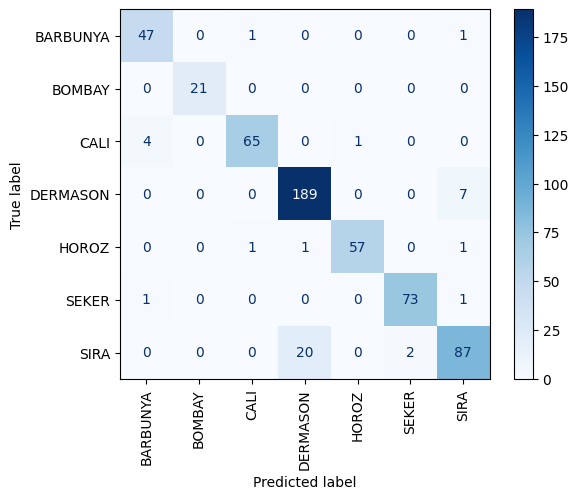

Classification Report:
               precision    recall  f1-score   support

    BARBUNYA       0.90      0.96      0.93        49
      BOMBAY       1.00      1.00      1.00        21
        CALI       0.97      0.93      0.95        70
    DERMASON       0.90      0.96      0.93       196
       HOROZ       0.98      0.95      0.97        60
       SEKER       0.97      0.97      0.97        75
        SIRA       0.90      0.80      0.84       109

    accuracy                           0.93       580
   macro avg       0.95      0.94      0.94       580
weighted avg       0.93      0.93      0.93       580

Overall Accuracy:  0.9293103448275862


In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#Define Scaler Function https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.StandardScaler.html
scaler = StandardScaler()
#Scale all features in dataset X as this will be passed to my evaluate function
X = scaler.fit_transform(X)
#Scale X_train and X_test as well as these will be used to train the model to obtain y_pred for confusion matrix. These were scaled for consistency since evaluate model is using scaled X
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
# Evaluate the model on the new scaled features
evaluate_model(ebclf, X, y)

#Train the model on the entire dataset
ebclf.fit(X_train, y_train)

#Make predictions on the entire dataset
y_pred = ebclf.predict(X_test)

#Generate confusion matrix 
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Display confusion matrix as a heatmap https://scikit-learn.org/dev/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.show()

# Print detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Report overall accuracy
print("Overall Accuracy: ", accuracy_score(y_test, y_pred))


**ANSWER CELL**

**Method**

In order to achieve the best results, the features of the dataset (X) were scaled using a StandardScaler in order to ensure the mean of the data is 1 and the standard deviation = 0. This is important as I used the .bfill() method to fill missing data which could ruin the dataset's Mean and Standard Deviation.
StandardScaler was applied to the full dataset features (X) as this was going to be passed into my evaluate_model function, however my evaluate_model function does not return a y_pred but rather calculates it during runtime and uses it for evaluation. To keep consistency, before training the ebclf model StandardScaler was used to scale the X_train and X_test data for consistency between the train and test splits and the full dataset (X).

**Evaluation of Model**

- Mean Accuracy: 0.9252
- Standard Deviation: 0.0132
- Summary of Classification Report: The classification report's PerClass Metrics give the insight that the model performed well across most classes, with high porecision and recall values.

**Confusion Matrix**

The confusion matrix visualizes the performance of the model. It shows the number of True Positives, True Negatives, False Positives for each class. This confusion matrix indicates that our model has a low number of misclassifications confirming the strong performance it has. As can be seen in the matrix, 21 out of 21 samples were correctly classified for the class BOMBAY, the least precise classification was SIRA as that has proved to be a challenging class to classify throughout this project, this was still 87 / 109 samples or otherwise interpreted as 80%. Overall the confusion matrix shows that the model has  ahigh number of true positives and a low number opf false positives and false negatives with an Overall Accuracy of 0.9293

**Summary**

The Voting Ensemble Bagged of Bagged Models achieved a mean accuracy of 0.9252 and a standard deviation of 0.0132 during cross-validation. This indicates accuracy and consistency in predictions. It combines the strengths of bagging and voting ensemble techniques, leading to a robust and generalizable model. The classification report shows that the model performed well across most classes with high precision and recall values. Further confirming its strong performance and low nuymber of misclassifcations.
The classfication report and accuracy of the confusion matrix show lower performance metrics compared to the cross validation evaluation results from the evaluate_model function. This could be due to the speceific split of the confusion matrix not utilizing multiple train test splits and only a single split. 
Overall this model proves to be the most robust out of the ones explored in this project for classification of beans.

## References

[1] Koklu, M. and Ozkan, I.A., 2020. Multiclass classification of dry beans using computer vision and machine learning techniques. _Computers and Electronics in Agriculture_, 174, p.105507.

[2] Murat Koklu: Dry Bean Dataset https://www.muratkoklu.com/datasets/ (accessed 14/08/2024)

[3] Mateen Ulhaq, Mike Hordecki (code) https://stackoverflow.com/a/522578/884412 (accessed 24/08/2023)

[4] Pazoki, A.R., Farokhi, F. and Pazoki, Z., 2014. Classification of rice grain varieties using two artificial neural networks (MLP and neuro-fuzzy).

[5] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.bfill.html

[6] Classification_report (no date) scikit. Available at: https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.classification_report.html (Accessed: 15 January 2025).

[7] Ibm (2024) What is support vector machine?, IBM. Available at: https://www.ibm.com/think/topics/support-vector-machine (Accessed: 15 January 2025). 

[8]Keylabs (2024) Understanding the F1 score and AUC-Roc Curve, Keylabs. Available at: https://keylabs.ai/blog/understanding-the-f1-score-and-auc-roc-curve/ (Accessed: 15 January 2025). 

[9]Logisticregression (no date) scikit. Available at: https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html (Accessed: 15 January 2025). 

[10] Pandas.dataframe.bfill# (no date) pandas.DataFrame.bfill - pandas 2.2.3 documentation. Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.bfill.html (Accessed: 15 January 2025). 

[11] Pandas.dataframe.head# (no date) pandas.DataFrame.head - pandas 2.2.3 documentation. Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html (Accessed: 15 January 2025). 

[12] Relova, Z. (2021) 3 tips for working with imbalanced datasets, Medium. Available at: https://towardsdatascience.com/3-tips-for-working-with-imbalanced-datasets-a765a0f3a0d0 (Accessed: 15 January 2025). 

[13] Shafi, A. (2023) K-Nearest Neighbors (KNN) classification with scikit-learn, DataCamp. Available at: https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn (Accessed: 15 January 2025). 

[14] Shah, R. (2024) Tune hyperparameters with GRIDSEARCHCV, Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2021/06/tune-hyperparameters-with-gridsearchcv/ (Accessed: 15 January 2025). 

[15] Stratifiedkfold (no date) scikit. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html (Accessed: 15 January 2025). 

[16] Train test split: What it means and how to use it (no date) Built In. Available at: https://builtin.com/data-science/train-test-split (Accessed: 15 January 2025). 

[17] What is the accuracy_score function in Sklearn? (no date) Educative. Available at: https://www.educative.io/answers/what-is-the-accuracyscore-function-in-sklearn (Accessed: 15 January 2025). 

[18] scikit-learn (2024). 1.10. Decision Trees. [online] scikit-learn. Available at: https://scikit-learn.org/1.5/modules/tree.html.

‌[19] Ravindran, R. (2023). Overfitting and Pruning in Decision Trees — Improving Model’s Accuracy. [online] Nerd For Tech. Available at: https://medium.com/nerd-for-tech/overfitting-and-pruning-in-decision-trees-improving-models-accuracy-fdbe9ecd1160.

‌[20] Banerjee, A. (2020). Computational Complexity of SVM. [online] Medium. Available at: https://alekhyo.medium.com/computational-complexity-of-svm-4d3cacf2f952.

[21]Abid Ali Awan (2023). What is Bagging in Machine Learning? A Guide With Examples. [online] Datacamp.com. Available at: https://www.datacamp.com/tutorial/what-bagging-in-machine-learning-a-guide-with-examples.

[22]scikit-learn. (2024). BaggingClassifier. [online] Available at: https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.BaggingClassifier.html.

[23]Soulpage IT Solutions. (2023). SoulPage IT Solutions. [online] Available at: https://soulpageit.com/ai-glossary/ensemble-voting-explained/.

[24]scikit-learn. (2024). ConfusionMatrixDisplay. [online] Available at: https://scikit-learn.org/dev/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html.

‌[25]scikit-learn. (2024). StandardScaler. [online] Available at: https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.StandardScaler.html.

‌

‌

